In [1]:
from ccdproc import ImageFileCollection
from reducer.image_browser import ImageBrowser
from astropy.time import Time
from astropy import units as u
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Load in the data

In [2]:
data_location = '.'

In [3]:
data_collection = ImageFileCollection(data_location)

In [4]:
data_collection.summary

file,simple,bitpix,naxis,naxis1,naxis2,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,telescop,instrume,notes,flipstat,swowner,date,time-obs,ut,timesys,radecsys,purged,latitude,longitud,altitude,lst,jd-obs,mjd-obs,biassec,trimsec,bunit,trim_image,trimim,subtract_bias,subbias,subtract_dark,subdark,history,cd1_1,cd1_2,cd2_1,cd2_2,a_0_0,a_0_1,a_1_0,b_0_0,b_0_1,b_1_0,ra,dec,wcsaxes,crpix1,crpix2,pc1_1,pc1_2,pc2_1,pc2_2,cdelt1,cdelt2,cunit1,cunit2,ctype1,ctype2,crval1,crval2,lonpole,latpole,radesys,equinox,bp_0_0,bp_0_1,bp_0_2,b_1_1,b_2_0,a_order,b_0_2,b_order,bp_order,ap_order,a_1_1,bp_2_0,ap_2_0,a_0_2,bp_1_1,bp_1_0,a_2_0,ap_1_0,ap_1_1,ap_0_1,ap_0_0,ap_0_2,objctra,objctdec,ha,airmass,secz,alt-obj,az-obj,object,flat_correct,flatcor,comment,master
str37,bool,int32,int32,int32,int32,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str21,object,str5,float64,float64,float64,str34,str32,str13,str14,str1,str9,str1,str1,str10,object,object,object,object,object,bool,str13,str14,float64,str13,float64,float64,str11,str11,str3,str6,str13,object,object,object,object,str5548,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
AutoFlat-PANoRot-B-Bin1-001-NoRot.fit,True,-32,2,4096,4096,2018-07-06T02:34:12,3.45,3.45,-20.0,-20.129373,9.0,9.0,1,1,0,0,Monochrome,B,FLAT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,+46:52:00.408,-96:27:11.8008,,AspenCG16,,,Matt Craig,06/07/18,02:34:12,02:34:12,UTC,FK5,True,+46:52:00.408,-96:27:11.8008,311.7999999995668,15:04:30.9073,2458305.607083333,58305.10708333334,[4096:4109],"[1:4096, :]",adu,trimim,ccd=<CCDData>,subbias,"ccd=<CCDData>, master=<CCDData>",subdark,"ccd=<CCDData>, master=<CCDData>, exposure_time=exposure, exposure_unit=s, scale=True","File was processed by PinPoint 6.1.3 at 2018-07-06T02:34:59,+++++ BEGIN patch_headers history on 2018-07-06 14:09:54.263669 +++++,patch_headers.py modified this file on 2018-07-06 14:09:54.263669,Deleted keyword OBJECT with value,Deleted keyword JD with value 2458305.60708,Deleted keyword JD-HELIO with value 2458305.6085,Deleted keyword OBSERVER with value,Updated keyword LATITUDE to value +46:52:00.408,Updated keyword SITELAT to value +46:52:00.408,Updated keyword LONGITUD to value -96:27:11.8008,Updated keyword SITELONG to value -96:27:11.8008,Updated keyword ALTITUDE to value 311.8,Updated keyword LST to value 15:04:30.9073,Updated keyword JD-OBS to value 2458305.60708,Updated keyword MJD-OBS to value 58305.1070833,Updated keyword BIASSEC to value [4096:4109],Updated keyword TRIMSEC to value [1:4096, :],Set image data unit to adu,----- END patch_headers history on 2018-07-06 14:09:54.263669 -----,+++++ BEGIN patch_headers history on 2018-07-06 14:23:17.849400 +++++,patch_headers.py modified this file on 2018-07-06 14:23:17.849400,Updated keyword LATITUDE to value +46:52:00.408,Updated keyword SITELAT to value +46:52:00.408,Updated keyword LONGITUD to value -96:27:11.8008,Updated keyword SITELONG to value -96:27:11.8008,Updated keyword ALTITUDE to value 311.8,Updated keyword LST to value 15:04:30.9073,Updated keyword JD-OBS to value 2458305.60708,Updated keyword MJD-OBS to value 58305.1070833,Updated keyword BIASSEC to value [4096:4109],Updated keyword TRIMSEC to value [1:4096, :],Set image data unit to adu,----- END patch_headers history on 2018-07-06 14:23:17.849400 -----,+++++ BEGIN patch_headers history on 2018-07-06 14:38:53.238258 +++++,patch_headers.py mo

# Image Browser for Clarity

In [5]:
fits_browser = ImageBrowser(data_collection, keys=['imagetyp', 'filter'])
fits_browser.display()

ImageBrowser(children=(Accordion(children=(Accordion(children=(Box(children=(Select(layout=Layout(width='100%'…

# Select Only the Relevent Images

In [6]:
def magic_name(filename):
    a = filename[:3]
    if a == 'CoRoT':
        b = '15.04'
    if '15.07' in filename:
        b = '15.07'
    if '15.05' in filename:
        b = '15.05'
    if '15.04' in filename:
        b = '15.04'
        
    c = a + b
    return c

In [7]:
assert magic_name('Koi-0732-b-0003r90.fit') == 'Koi15.04'
assert magic_name('track_15.07-0002r15.fit') == 'tra15.07'

In [9]:
lights = data_collection.summary['imagetyp'] == 'LIGHT'
new_summary = data_collection.summary[lights]
new_col = [magic_name(filename) for filename in new_summary['file']]
new_summary['magic'] = new_col
del new_summary['history'], new_summary['comment']
plot_info = new_summary.group_by('file')
plot_info

file,simple,bitpix,naxis,naxis1,naxis2,date-obs,exptime,exposure,set-temp,ccd-temp,xpixsz,ypixsz,xbinning,ybinning,xorgsubf,yorgsubf,readoutm,filter,imagetyp,focallen,aptdia,aptarea,swcreate,swserial,sitelat,sitelong,telescop,instrume,notes,flipstat,swowner,date,time-obs,ut,timesys,radecsys,purged,latitude,longitud,altitude,lst,jd-obs,mjd-obs,biassec,trimsec,bunit,trim_image,trimim,subtract_bias,subbias,subtract_dark,subdark,focusssz,focustem,objctra,objctdec,ra,dec,ha,airmass,secz,alt-obj,az-obj,cd1_1,cd1_2,cd2_1,cd2_2,a_0_0,a_0_1,a_1_0,b_0_0,b_0_1,b_1_0,wcsaxes,crpix1,crpix2,pc1_1,pc1_2,pc2_1,pc2_2,cdelt1,cdelt2,cunit1,cunit2,ctype1,ctype2,crval1,crval2,lonpole,latpole,radesys,equinox,bp_0_0,bp_0_1,bp_0_2,b_1_1,b_2_0,a_order,b_0_2,b_order,bp_order,ap_order,a_1_1,bp_2_0,ap_2_0,a_0_2,bp_1_1,bp_1_0,a_2_0,ap_1_0,ap_1_1,ap_0_1,ap_0_0,ap_0_2,object,flat_correct,flatcor,master,magic
str37,bool,int32,int32,int32,int32,str19,float64,float64,float64,float64,float64,float64,int32,int32,int32,int32,str10,object,str5,float64,float64,float64,str34,str32,str13,str14,str1,str9,str1,str1,str10,object,object,object,object,object,bool,str13,str14,float64,str13,float64,float64,str11,str11,str3,str6,str13,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,str8
Koi-0732-b-0001r90.fit,True,-32,2,4096,4096,2018-06-28T04:05:03,90.0,90.0,-20.0,-20.053935000000003,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,+46:52:00.408,-96:27:11.8008,,AspenCG16,,,Matt Craig,2018-06-28T17:03:56,--,--,--,--,True,+46:52:00.408,-96:27:11.8008,311.7999999995668,16:04:04.3815,2458297.670173611,58297.17017361111,[4096:4109],"[1:4096, :]",adu,trimim,ccd=<CCDData>,subbias,"ccd=<CCDData>, master=<CCDData>",subdark,"ccd=<CCDData>, master=<CCDData>, exposure_time=exposure, exposure_unit=s, scale=True",6.201171874993303,0.0,15:02:39,+44:50:37,19:12:42.5314,47:20:33.4836,1:01:25.3815,1.018,1.018,79.22776,264.36181,0.000152764015009,-3.33756750758e-05,3.33704673057e-05,0.000152745560429,0,0,0,0,0,0,2,2055.0,2048.5,0.000152764015009,-3.33756750758e-05,3.33704673057e-05,0.000152745560429,1.0,1.0,deg,deg,RA---TAN-SIP,DEC--TAN-SIP,288.179063251,47.3420278368,180.0,47.3420278368,FK5,2000.0,1.92241210976e-07,1.81809725969e-07,1.78807325493e-07,-6.03614818293e-08,1.4045275975e-08,2,-1.78807470033e-07,2,2,2,-7.46410981999e-08,-1.40452847997e-08,-5.86870659091e-09,-9.74897870781e-08,6.0361438003e-08,4.91859797531e-08,5.86869723209e-09,4.15043669896e-08,7.4641056929e-08,1.13876631912e-07,1.31934507356e-07,9.74896942441e-08,koi -0732,flatcor,"ccd=<CCDData>, flat=<CCDData>",--,Koi15.04
Koi-0732-b-0002r90.fit,True,-32,2,4096,4096,2018-06-28T04:06:53,90.0,90.0,-20.0,-20.06336475,9.0,9.0,1,1,0,0,Monochrome,r,LIGHT,3200.0,400.0,125663.70964050293,MaxIm DL Version 6.16 190601 00KPP,00KPP-F3HN8-9JMTJ-1CE5W-A4AX5-F3,+46:52:00.408,-96:27:11.8008,,AspenCG16,,,Matt Craig,2018-06-28T17:04:03,--,--,--,--,True,+46:52:00.408,-96:27:11.8008,311.7999999995668,16:05:54.6826,2458297.671446759,58297.17144675926,[4096:4109],"[1:4096, :]",adu,trimim,ccd=<CCDData>,subbias,"ccd=<CCDData>, master=<CCDData>",subdark,"ccd=<CCDData>, master=<CCDData>, exposure_time=exposure, exposure_unit=s, scale=True",6.201171874993303,0.0,15:02:39,+44:50:37,19:12:42.5333,47:20:32.8373,1:03:15.6826,1.019,1.019,78.91493,264.85019,0.00015276589815,-3.33713856441e-05,3.33765831718e-05,0.000152746840686,0,0,0,0,0,0,2,2055.0,2048.5,0.00015276589815,-3.33713856441e-05,3.33765831718e-05,0.000152746840686,1.0,1.0,deg,deg,

In [7]:
print(plot_info['file'])

          file         
-----------------------
 Koi-0732-b-0001r90.fit
 Koi-0732-b-0002r90.fit
 Koi-0732-b-0003r90.fit
 Koi-0732-b-0004r90.fit
 Koi-0732-b-0005r90.fit
 Koi-0732-b-0006r90.fit
 Koi-0732-b-0007r90.fit
 Koi-0732-b-0008r90.fit
 Koi-0732-b-0009r90.fit
 Koi-0732-b-0010r90.fit
                    ...
 Koi-0732-b-0088r90.fit
 Koi-0732-b-0089r90.fit
track_15.04-0001r15.fit
track_15.04-0002r15.fit
track_15.04-0003r15.fit
track_15.05-0001r15.fit
track_15.05-0002r15.fit
track_15.05-0003r15.fit
track_15.07-0001r15.fit
track_15.07-0002r15.fit
track_15.07-0003r15.fit
Length = 98 rows


# Extract Times, RAs, and DECs

In [64]:
name = defaultdict(list)
mytime = defaultdict(list)
image_RA = defaultdict(list)
image_DEC = defaultdict(list)

for current_filter, date, RA, DEC, filename in zip(plot_info['magic'], plot_info['date-obs'], plot_info['crval1'], plot_info['crval2'], plot_info['file']):
    time = Time(date, scale='utc')
    name[current_filter].append(filename)
    mytime[current_filter].append(time)
    image_RA[current_filter].append(RA)
    image_DEC[current_filter].append(DEC)
    
for key in mytime:
    mytime[key] = np.array([(t - mytime[key][0]).sec for t in mytime[key]])
    image_RA[key] = np.array(image_RA[key]) * u.deg
    image_DEC[key] = np.array(image_DEC[key]) * u.deg

In [81]:
feder_pixel_scale = u.pixel_scale(u.arcsec * .556 / u.pixel)
u.set_enabled_equivalencies(feder_pixel_scale)

# Plotting the data

In [82]:
def filter_plot(time, RA, DEC, filter_, ylim=None, unit='degree'):
    plt.figure(figsize=(5, 5))
    plt.plot(time[filter_], (RA[filter_] - RA[filter_][0]).to(unit), 'r-', label='RA')
    plt.plot(time[filter_], (DEC[filter_] - DEC[filter_][0]).to(unit), 'b-', label='DEC')
    plt.title(filter_ + '_Filter_Drift')
    if ylim is not None:
        plt.ylim(*ylim)
    plt.ylabel(str(unit))
    plt.xlabel('Time (s)')
    plt.xticks(rotation='vertical')
    plt.legend()
    
    

## Images for this night are only in r filter

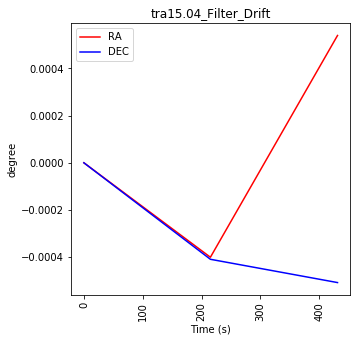

In [84]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.04')

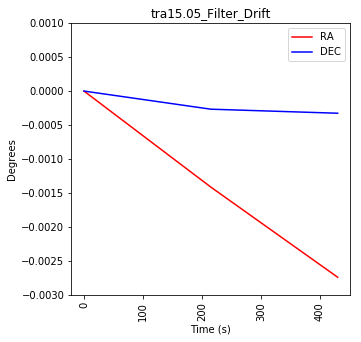

In [71]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.05', ylim=(-.003, .001))

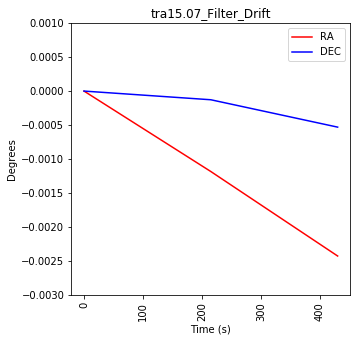

In [72]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.07', ylim=(-.003, .001))

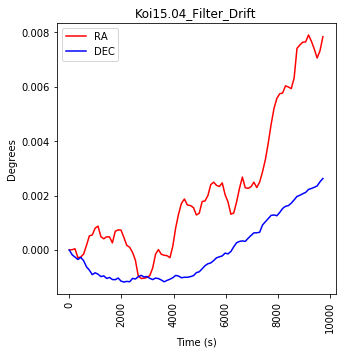

In [62]:
filter_plot(mytime, image_RA, image_DEC, 'Koi15.04')

# Now in Arcseconds

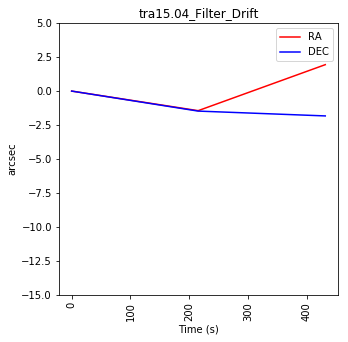

In [93]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.04', unit='arcsec', ylim=(-15, 5))

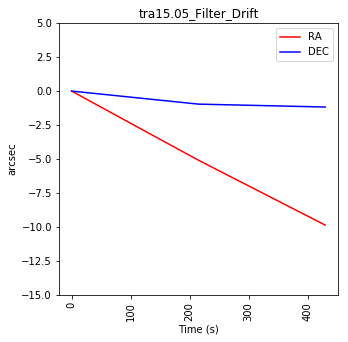

In [90]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.05', unit='arcsec', ylim=(-15, 5))

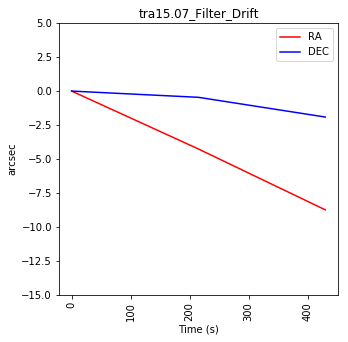

In [91]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.07', unit='arcsec', ylim=(-15, 5))

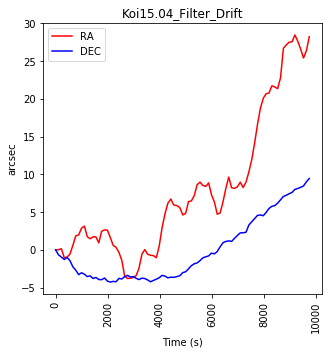

In [88]:
filter_plot(mytime, image_RA, image_DEC, 'Koi15.04', unit='arcsec')

# Now in Pixels

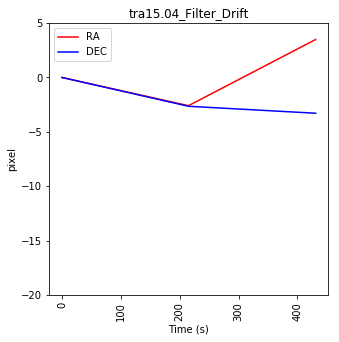

In [102]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.04', unit='pixel', ylim=(-20, 5))

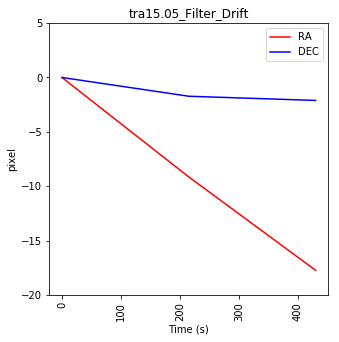

In [100]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.05', unit='pixel', ylim=(-20, 5))

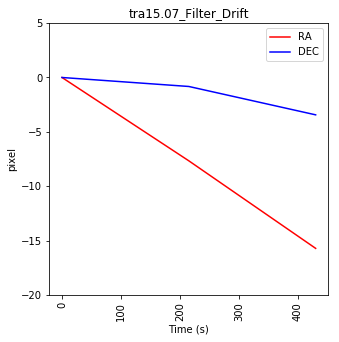

In [101]:
filter_plot(mytime, image_RA, image_DEC, 'tra15.07', unit='pixel', ylim=(-20, 5))

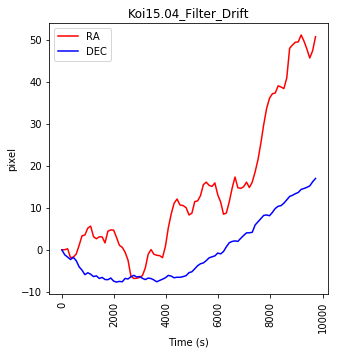

In [104]:
filter_plot(mytime, image_RA, image_DEC, 'Koi15.04', unit='pixel')